## 783. 二叉搜索树节点最小距离
给你一个二叉搜索树的根节点 root ，返回 树中任意两不同节点值之间的最小差值 。
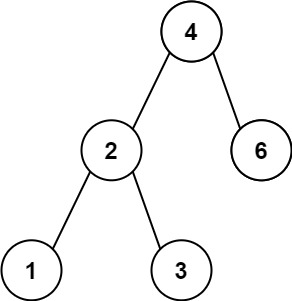
```
输入：root = [4,2,6,1,3]
输出：1
```
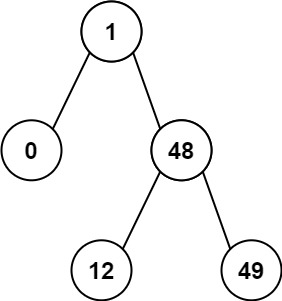
```
入：root = [1,0,48,null,null,12,49]
输出：1
```

### 1. 二叉搜索树（BST）
遇到二叉搜索树，立刻想到这句话：**「二叉搜索树（BST）的中序遍历是有序的**。这是解决所有二叉搜索树问题的关键。

要求 BST 的任意两个不同节点之间的最小差值，也就是相当于求 BST 中序遍历得到的有序序列中所有相邻节点之间的最小差值。

> 二叉树遍历的经验：先序、中序、后序遍历方式的区别在于把「执行操作」放在两个递归函数的位置。

1. 先序遍历：
```python
def dfs(root):
    if not root:
        return
    执行操作
    dfs(root.left)
    dfs(root.right)
```
2. 中序遍历
```python
def dfs(root):
    if not root:
        return
    dfs(root.left)
    执行操作
    dfs(root.right)
```
3. 后序遍历
```python
def dfs(root):
    if not root:
        return
    dfs(root.left)
    dfs(root.right)
	执行操作
```

- 先中序遍历，把结果放在数组中；
- 然后对数组中的相邻元素求差，得到所有差值的最小值。

In [25]:

# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
    def __str__(self):
        return f'<{self.val}, {self.left}, {self.right}>'

class Solution(object):
    def minDiffInBST(self, root):
        self.vals = []
        self.inOrder(root)
        return min([self.vals[i + 1] - self.vals[i] for i in range(len(self.vals) - 1)])

    def inOrder(self, root):
        if not root:
            return 
        self.inOrder(root.left)
        self.vals.append(root.val)
        self.inOrder(root.right)

from collections import deque
def create_binary_Tree(nums):
    if len(nums) == 0:
        return None
    n = iter(nums)
    tree = TreeNode(next(n))
    fringe = deque([tree])
    while True:
        head = fringe.popleft()
        try:
            head.left = TreeNode(next(n))
            fringe.append(head.left)
            head.right = TreeNode(next(n))
            fringe.append(head.right)
        except StopIteration:
            break
    return tree
    

In [31]:
# Another way to create binary tree
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

class TreeNode(object):
    def __init__(self, data, left=None, right=None):
        self.val = data
        self.left = left
        self.right = right
    
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return '(V:{}, L:{}, R:{})'.format(self.val, left, right)
    
def build_tree_breadth_first(sequence):
    # Create a list of trees
    forest = [TreeNode(x) for x in sequence]
    
    count = len(forest)
    for index, tree in enumerate(forest):
        left_index = 2 * index + 1
        if left_index < count:
            tree.left = forest[left_index]
        right_index = 2 * index + 2
        if right_index < count:
            tree.right = forest[right_index]
        
    for index, tree in enumerate(forest):
        logger.debug('[{}]: {}'.format(index, tree))
    return forest[0]

In [32]:
ss = Solution()
nums = [4,2,6,1,3]
tree = build_tree_breadth_first(nums)
res = ss.minDiffInBST(tree)
print(tree)
print(res)

DEBUG:__main__:[0]: (V:4, L:2, R:6)
DEBUG:__main__:[1]: (V:2, L:1, R:3)
DEBUG:__main__:[2]: (V:6, L:None, R:None)
DEBUG:__main__:[3]: (V:1, L:None, R:None)
DEBUG:__main__:[4]: (V:3, L:None, R:None)


(V:4, L:2, R:6)
1


- 时间复杂度：$O(N)$，因为每个节点只访问了一次；
- 空间复杂度：$O(N)$，因为需要数组保存二叉树的每个节点值。

#### 方法二：只保存上个节点
在方法一中，我们保存了整个中序遍历数组，比较浪费空间。

其实我们只需要知道，在中序遍历的时候的两个被依次访问的节点。注意，这里说的不是 BST 的相邻节点，因为在中序遍历时，在访问根节点前，上一个被访问的节点是其左子树的最右下角的节点。如下图所示，访问 节点4 之前，访问的是节点3

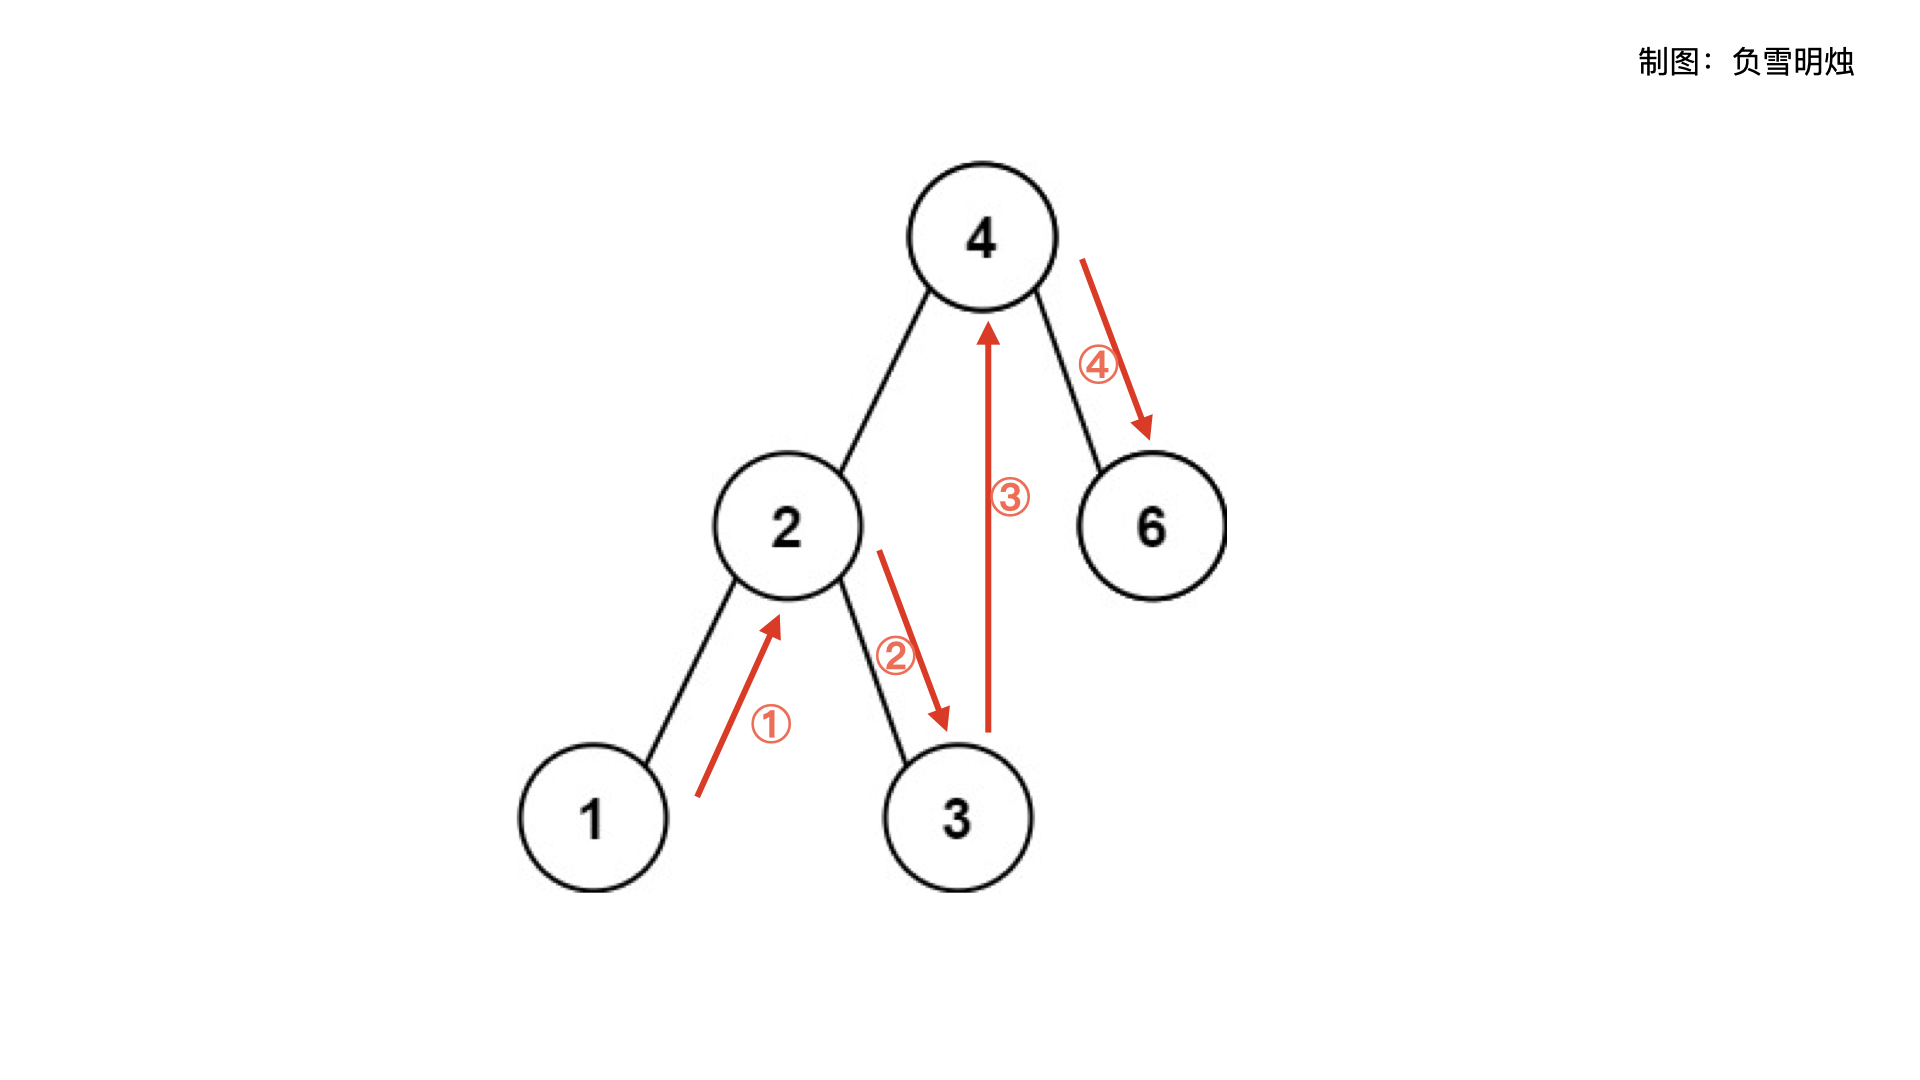


所以，我们只需要一个变量 prev 保存在中序遍历时，上一次被访问的节点。因为在中序遍历的过程中，节点的值是依次递增的，因此求差值的方式应该是 root.val - prev.val ，对该值取最小，就是 BST 任意两个节点的最小差值。

这里需要注意一个细节：中序遍历时的第一个节点，并没有 prev 节点。此时应该怎么办？其实就是不求 第一个节点 和 上个节点的差值就行。可以把 prev 初始化为 None，遍历时对 prev 进行一个判断，如果 prev 为 None，说明当前遍历的是中序遍历的第一个节点，跳过求差值；此后的遍历中，在每次求完 diff 之后，把 prev 设置为当前遍历的节点。


In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution(object):
    def minDiffInBST(self, root):
        self.prev = None
        self.minDiff = 10e6
        self.inOrder(root)
        return self.minDiff

    def inOrder(self, root):
        if not root:
            return 
        self.inOrder(root.left)
        if self.prev:
            self.minDiff = min(root.val - self.prev.val, self.minDiff)
        self.prev = root
        self.inOrder(root.right)

时间复杂度：$O(N)$，因为每个节点只访问了一次；
空间复杂度：$O(N)$，因为递归用了系统栈。

## 897. 递增顺序搜索树
给你一棵二叉搜索树，请你 按中序遍历 将其重新排列为一棵递增顺序搜索树，使树中最左边的节点成为树的根节点，并且每个节点没有左子节点，只有一个右子节点。


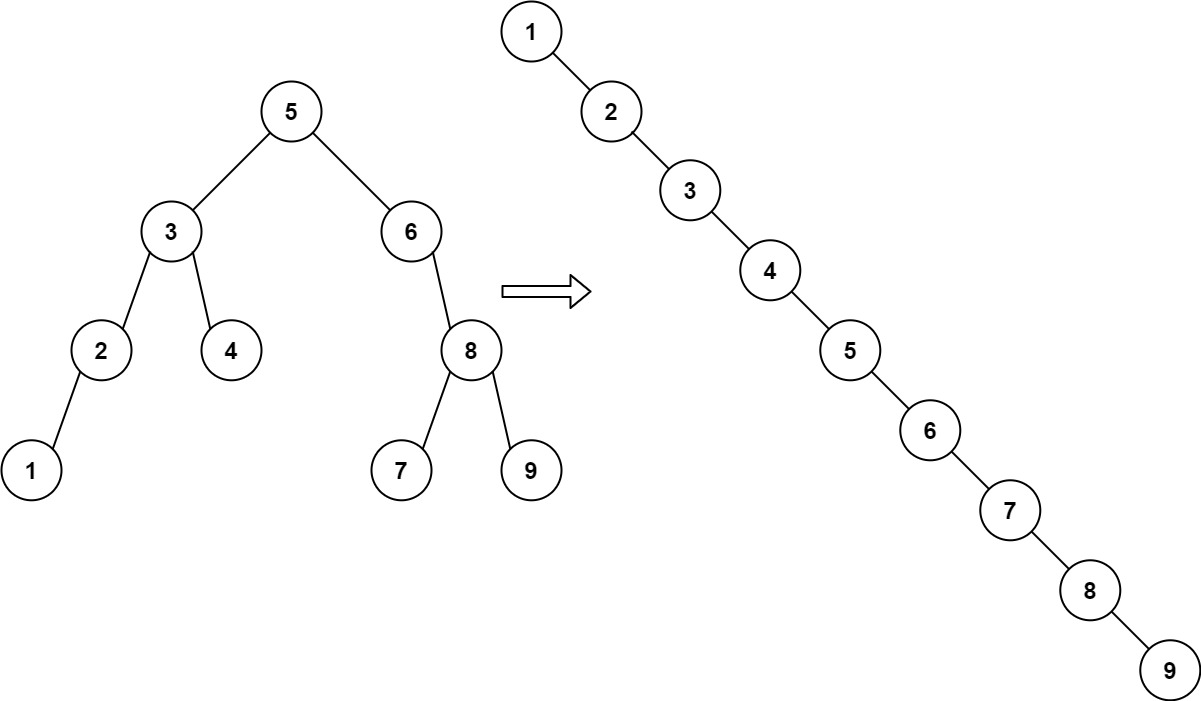
示例 1：
```
输入：root = [5,3,6,2,4,null,8,1,null,null,null,7,9]
输出：[1,null,2,null,3,null,4,null,5,null,6,null,7,null,8,null,9]
```
示例 2：
```
输入：root = [5,1,7]
输出：[1,null,5,null,7]
 ```
提示：
```
树中节点数的取值范围是 [1, 100]
0 <= Node.val <= 1000
```

In [1]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def increasingBST(self, root: TreeNode) -> TreeNode:
        if root is None:
            return None
        dummy = TreeNode(-1)
        cur = dummy
        self.res = []
        self.inOrder(root)
        for node in self.res:
            node.right = node.left = None
            cur.right = node
            cur = cur.right
        return dummy.right
    
    def inOrder(self, root):
        if root is None:
            return
        self.inOrder(root.left)
        self.res.append(root)
        self.inOrder(root.right)

NameError: name 'TreeNode' is not defined

### 方法二：只保存上个节点

所以，我们只需要一个变量 prev 保存在中序遍历时，上一次被访问的节点。那么我们每次遍历的时候：

 - 把当前节点 root.left 设置为 null；
 - 把 prev.right 设置为当前遍历的节点 root；
 - 把当前 root 设置为 prev。

In [2]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def increasingBST(self, root: TreeNode) -> TreeNode:
        dummy = TreeNode(-1)
        self.prev = dummy
        self.inOrder(root)
        return dummy.right
        
    def inOrder(self, root):
        self.inOrder(root.left)
        root.left = None   # 把当前节点 root.left 设置为 null
        self.prev.right = root   # 把 prev.right 设置为当前遍历的节点 root；
        self.prev = root   # 把当前 root 设置为 prev
        self.inOrder(root.right)

NameError: name 'TreeNode' is not defined

## 530. 二叉搜索树的最小绝对差

给你一棵所有节点为非负值的二叉搜索树，请你计算树中任意两节点的差的绝对值的最小值。

 

示例：
```
输入：

   1
    \
     3
    /
   2

输出：
1

解释：
最小绝对差为 1，其中 2 和 1 的差的绝对值为 1（或者 2 和 3）。
 ```

提示：
```
树中至少有 2 个节点。
```

二叉搜索树可是有序的。

遇到在二叉搜索树上求什么最值啊，差值之类的，就把它想成在一个有序数组上求最值，求差值，这样就简单多了。

### 递归
那么二叉搜索树采用中序遍历，其实就是一个有序数组。

在一个有序数组上求两个数最小差值，这是不是就是一道送分题了。

最直观的想法，就是把二叉搜索树转换成有序数组，然后遍历一遍数组，就统计出来最小差值了。

In [51]:
class TreeNode:
    def __init__(self, data):
        self.val = data
        self.left = None
        self.right = None
    def __str__(self):
        return f'<{self.val}, {self.left}, {self.right}>'
        
class Solution:
    def getMinimumDifference(self, root: TreeNode) -> int:
        vec = self.traversal(root)
        if len(vec) < 2: return 0
        res = 10e6
        for i in range(1, len(vec)):
            res = min(res, vec[i] - vec[i-1])
        return res
        
    def traversal(self, root):
        nums = []
        if root == None: return
        self.traversal(root.left)
        nums.append(root.val)
        self.traversal(root.right)
        return nums


## 208. 实现 Trie (前缀树)
`Trie`（发音类似 "try"） 又叫「前缀树」或「字典树」 是一种树形数据结构，用于高效地存储和检索字符串数据集中的键。这一数据结构有相当多的应用情景，例如自动补完和拼写检查。

请你实现 `Trie` 类：

- Trie() 初始化前缀树对象。
- void insert(String word) 向前缀树中插入字符串 word 。
- boolean search(String word) 如果字符串 word 在前缀树中，返回 true（即，在检索之前已经插入）；否则，返回 false 。
- boolean startsWith(String prefix) 如果之前已经插入的字符串 word 的前缀之一为 prefix ，返回 true ；否则，返回 false 。

示例：
```
输入
["Trie", "insert", "search", "search", "startsWith", "insert", "search"]
[[], ["apple"], ["apple"], ["app"], ["app"], ["app"], ["app"]]
输出
[null, null, true, false, true, null, true]

解释
Trie trie = new Trie();
trie.insert("apple");
trie.search("apple");   // 返回 True
trie.search("app");     // 返回 False
trie.startsWith("app"); // 返回 True
trie.insert("app");
trie.search("app");     // 返回 True
```

Trie 树（又叫「前缀树」或「字典树」）是一种用于快速查询「某个字符串/字符前缀」是否存在的数据结构。

其核心是使用「边」来代表有无字符，使用「点」来记录是否为「单词结尾」以及「其后续字符串的字符是什么」。

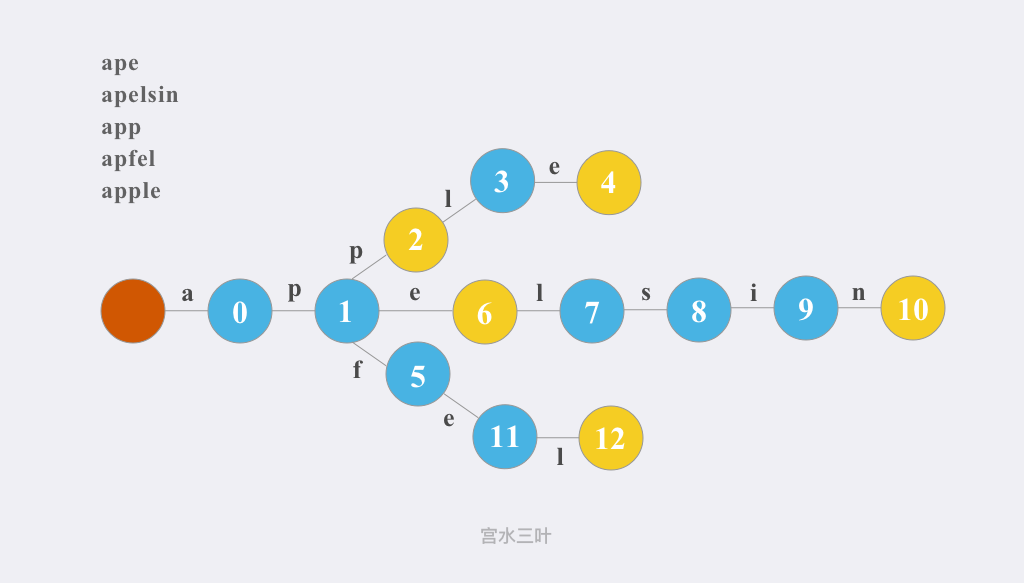

### 二维数组
一个朴素的想法是直接使用「二维数组」来实现 `Trie` 树。

- 使用二维数组 `trie[]` 来存储我们所有的单词字符。
- 使用 `index` 来自增记录我们到底用了多少个格子（相当于给被用到格子进行编号）。
- 使用 `count[]` 数组记录某个格子被「被标记为结尾的次数」（当 `idx` 编号的格子被标记了 $n$ 次，则有` cnt[idx] = n`）

In [37]:
class Trie:
    
    N = 100009
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.trie = [[0] * self.N for _ in range(26)]
        self.count = [0] * self.N
        self.index = 0


    def insert(self, word: str) -> None:
        """
        Inserts a word into the trie.
        """
        p = 0
        for i in range(len(word)):
            u = ord(word[i]) - ord('a')
            if self.trie[u][p] == 0:
                self.index += 1
                self.trie[u][p] = self.index
            p = self.trie[u][p]
        self.count[p] += 1

    def search(self, word: str) -> bool:
        """
        Returns if the word is in the trie.
        """
        p = 0
        for i in range(len(word)):
            u = ord(word[i]) - ord('a')
            if self.trie[u][p] == 0:
                return False
            p = self.trie[u][p]
        return self.count[p] != 0


    def startsWith(self, prefix: str) -> bool:
        """
        Returns if there is any word in the trie that starts with the given prefix.
        """
        p = 0
        for i in range(len(prefix)):
            u = ord(prefix[i]) - ord('a')
            if self.trie[u][p] == 0:
                return False
            p = self.trie[u][p]
        return True

In [42]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

[I 01:20:23.026 NotebookApp] 端口 8888 已经被站用, 请尝试其他端口.
[I 01:20:23.180 NotebookApp] [jupyter_nbextensions_configurator] enabled 0.4.1
[I 01:20:27.147 NotebookApp] JupyterLab extension loaded from /home/lonelvino/anaconda3/lib/python3.8/site-packages/jupyterlab
[I 01:20:27.147 NotebookApp] JupyterLab application directory is /home/lonelvino/anaconda3/share/jupyter/lab
[I 01:20:27.150 NotebookApp] 启动notebooks 在本地路径: /home/lonelvino/MyGit/Algorithmic/Leetcode
[I 01:20:27.150 NotebookApp] Jupyter Notebook 6.2.0 is running at:
[I 01:20:27.150 NotebookApp] http://localhost:8889/?token=9cb5d57afe9a286e169a7d4a76facf0819f46b130fd70ae0
[I 01:20:27.150 NotebookApp]  or http://127.0.0.1:8889/?token=9cb5d57afe9a286e169a7d4a76facf0819f46b130fd70ae0
[I 01:20:27.150 NotebookApp] 使用control-c停止此服务器并关闭所有内核(两次跳过确认).
[C 01:20:27.316 NotebookApp] 
    
    To access the notebook, open this file in a browser:
        file:///home/lonelvino/.local/share/jupyter/runtime/nbserver-11864-open.html
    Or copy and 

[W 01:21:36.922 NotebookApp] Config option `template_path` not recognized by `TocExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
[W 01:21:36.929 NotebookApp] Config option `template_path` not recognized by `TocExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
[W 01:21:36.954 NotebookApp] Config option `template_path` not recognized by `LenvsHTMLExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
[W 01:21:36.966 NotebookApp] Config option `template_path` not recognized by `LenvsHTMLExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
[W 01:21:37.003 NotebookApp] Config option `template_path` not recognized by `LenvsTocHTMLExporter`.  Did you mean one of: `extra_template_paths, template_name, template_paths`?
[W 01:21:37.015 NotebookApp] Config option `template_path` not recognized by `LenvsTocHTMLExporter`.  Did you mean one of: `extra_temp

In [41]:
# Your Trie object will be instantiated and called as such:
obj = Trie()
words = ['app', 'ape', 'apelsin', 'apfel', 'apple']
for word in words:
    obj.insert(word)
word = 'apfel'
prefix = 'app'
param_2 = obj.search(word)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



- 时间复杂度：`Trie` 树的每次调用时间复杂度取决于入参字符串的长度。复杂度为 $O(Len)$
- 空间复杂度：二维数组的高度为 $n$ 字符集大小为 $k$ 复杂度为 $O(nk)$

### TrieNode
相比二维数组，更加常规的做法是建立 `TrieNode` 结构节点。

随着数据的不断插入，根据需要不断创建 `TrieNode` 节点。
